# Predicting Body Weight With Height (Linear Regression / Classification)

## Loading Our Data

In [11]:
# Importing necessary dependencies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file (pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [12]:
# Importing the data
df= pd.read_csv('weight-height.csv')

In [13]:
# Loading the data

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [66]:
# Shape
df.shape

(10000, 3)

So we have the height and weight of 10000 individuals

In [67]:
# Getting data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [68]:
# Describing the data
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


We can see that mean height is 169 cm and weight is 106 pounds



In [69]:
# Getting count of Gender in the Data
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

So we have equal distribution of Male and Female in the datset

In [14]:
# Looking for null values

df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

There are no null values in our data.

## Visualization

Understanding the code:
1. kind: Shows what kind of plot we want to visualize. e,g, hist, box and other kind.
2. title: The title of the plot.
3. color: you can choose any color. In my case 'c' stands for cyan

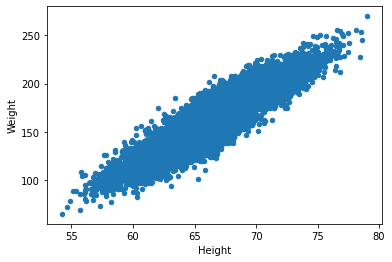

In [70]:
# Scatter Plot with Weight as a function of Height
df.plot(kind='scatter',x='Height',y='Weight');

**Observation:**

We can see that there is almost a Linear relation between Height and Weight.As Height increases, weight increases.This is quite obvious as bone weight would be more in taller people.

In [71]:
# Male and Female Separation on Scatter Plot

males=df[df['Gender']=='Male']
females=df[df['Gender']=='Female']

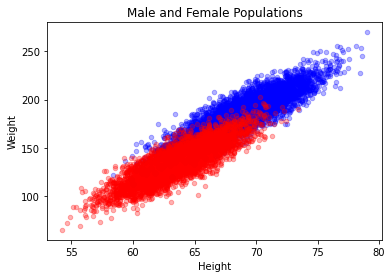

In [72]:
fig,ax = plt.subplots()
males.plot(kind='scatter',x='Height',y='Weight',
          ax=ax,color='blue',alpha=0.3,
          title='Male and Female Populations')
females.plot(kind='scatter',x='Height',y='Weight',
          ax=ax,color='red',alpha=0.3,
          title='Male and Female Populations');

**Observation:**

So we can see that there is a clear seperation between Male and Female.Women generally have lower height than Men so their weighs alos proportionally lower.

In [73]:
df['Genddercolor'] = df['Gender'].map({'Male':'blue','Female':'red'})

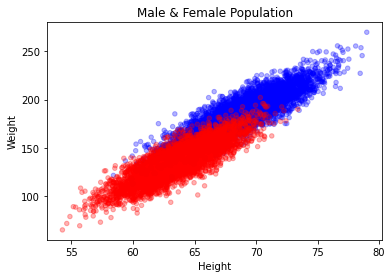

In [74]:
df.plot(kind='scatter',x='Height',y='Weight',c=df['Genddercolor'],
        alpha=0.3,title='Male & Female Population');

We have managed to plot the same graph with different technique using map command.

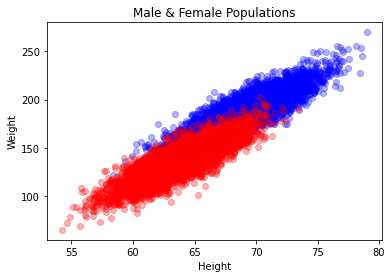

In [75]:
# Here we will use a simple matplotlib techinique to plot the same graph.

fig,ax = plt.subplots()
ax.plot(males['Height'],males['Weight'],'ob',females['Height'],females['Weight'],'or',alpha=0.3)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Male & Female Populations');

### Distribution Using Histograms

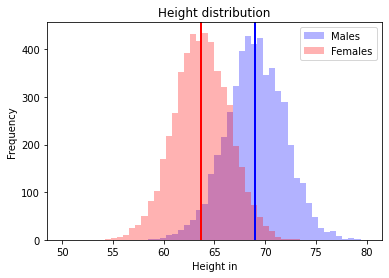

In [76]:
# Height Distribution

males['Height'].plot(kind='hist',bins=50,range=(50,80),alpha=0.3,color='blue')
females['Height'].plot(kind='hist',bins=50,range=(50,80),alpha=0.3,color='red')
plt.title('Height distribution')
plt.legend(['Males','Females'])
plt.xlabel('Height in')
plt.axvline(males['Height'].mean(),color='blue',linewidth=2)
plt.axvline(females['Height'].mean(),color='red',linewidth=2);

**Observation:**

As expected the Male gender are taller than Female.The red and blue lines show the mean of Female and Male height.


In [79]:
# Box Plot

dfpvt=df.pivot(columns='Gender',values='Weight')
dfpvt.head(2)

Gender,Female,Male
0,NaN,241.893563
1,NaN,162.310473


Text(0, 0.5, 'Weight (lb)')

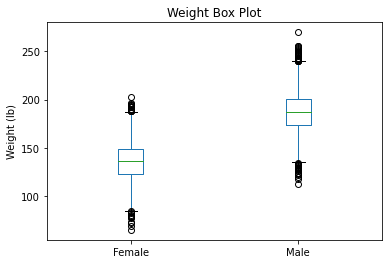

In [80]:
dfpvt.plot(kind='box');
plt.title('Weight Box Plot')
plt.ylabel('Weight (lb)')

So we can see the box plot shows the spread of weight for male and female.



### KDE Distribution

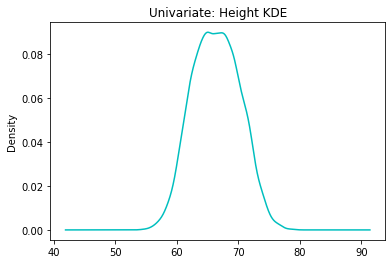

In [18]:
# KDE distribution for Height
df.Height.plot(kind="kde", title='Univariate: Height KDE', color='c');

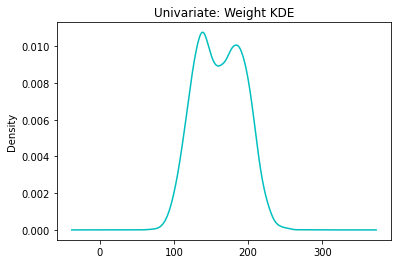

In [19]:
# KDE distribution for Weight
df.Weight.plot(kind="kde", title='Univariate: Weight KDE', color='c');


# Weight Prediction

### Method 1

In [81]:
X=df['Height'].values[:,None]
X.shape

(10000, 1)

In [82]:
y=df.iloc[:,2].values
y.shape

(10000,)

In [83]:
# Splitting the test train data

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Linear Regression**

In [84]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the Weight**

In [85]:
y_test=lm.predict(X_test)
print(y_test)

[179.25399046 180.34848321 161.62288801 ... 129.20288223 166.78470522
 101.81227499]


**Plotting the given data against the predicted data**

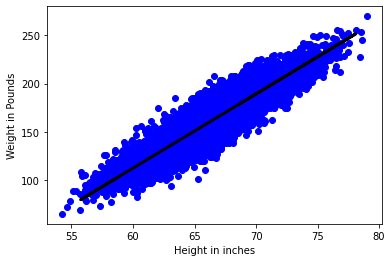

In [87]:
plt.scatter(X,y,color='b')
plt.plot(X_test,y_test,color='black',linewidth=3)
plt.xlabel('Height in inches')
plt.ylabel('Weight in Pounds')
plt.show()

**Observation:**

The blue dots are the actual weight and the black line indicates the linear model prediction.

**Model Performance**

In [88]:
y_train_pred=lm.predict(X_train).ravel()
y_test_pred=lm.predict(X_test).ravel()

In [91]:
from sklearn.metrics import mean_squared_error as mse, r2_score

In [92]:
print("The Mean Squared Error on Train set is:\t{:0.1f}".format(mse(y_train,y_train_pred)))
print("The Mean Squared Error on Test set is:\t{:0.1f}".format(mse(y_test,y_test_pred)))


The Mean Squared Error on Train set is:	149.4
The Mean Squared Error on Test set is:	0.0


**Observation**

The mean squared error value for a good model should have low value.


In [93]:
print("The R2 score on the Train set is:\t{:0.1f}".format(r2_score(y_train,y_train_pred)))
print("The R2 score on the Test set is:\t{:0.1f}".format(r2_score(y_test,y_test_pred)))

The R2 score on the Train set is:	0.9
The R2 score on the Test set is:	1.0


**Observation**

The R2 Square error for a good model should be close to 1.


### Method 2

In [21]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [22]:
x = df.iloc[:, 1:2].values
y = df.iloc[:, 2:3].values

Split Train, Test Data : Let's Split our Data 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state = 31)

**Linear Regression Model**

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regressor = LinearRegression()

In [27]:
model_fit = regressor.fit(x_train, y_train)

In [28]:
y_predict = regressor.predict(x_test)

In [29]:
y_predict

array([[163.3254169 ],
       [172.4561169 ],
       [141.93545547],
       ...,
       [183.17868191],
       [151.35818679],
       [140.9103195 ]])

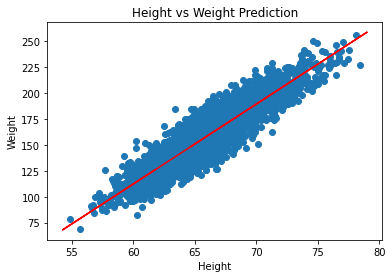

In [30]:
plt.scatter(x_test, y_test)
plt.plot(x_train, regressor.predict(x_train), color = 'r')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight Prediction")
plt.show()

**Observation**: our regression line is finely fitting our data points.

The blue points are actual values & points on red line are predicted values.

**Accuracy**

To find accuracy of model we can utilise metrics like:
- R-square,  mean-squared-error(MSE),  root-mean-squared-error(RMSE)

r value/score is an indicator of how strong the relationships are. (It is a measurement based on the spread of the data)

In [31]:
from sklearn.metrics import r2_score

In [32]:
print(f"Model accuracy is: {regressor.score(x_test, y_test)}")

Model accuracy is: 0.8518184505555159


**Observation** : Our Model accuracy is 85%, which is not bad.

In [33]:
r2_score(y_test, y_predict)

0.8518184505555159

## Classification 


Previously we saw how to predict Weigth by Height, which is simple because:
1. Both were numeric values
2. There was only one independent variable or feature(Height).

Previously we were finding continuous values like Weight but here we will be finding discrete values like Male or Female, hence we will using classification.

### KNN Classification

[K nearest neighbors](https://www.saedsayad.com/k_nearest_neighbors.htm#:~:text=K%20nearest%20neighbors%20is%20a,as%20a%20non%2Dparametric%20technique.) is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

It will plot your data points on the graph and select the 'n' number of neighbors(which you define) and relate your datapoint to majority.

In [34]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [35]:
x_ml = df.iloc[:, 1:3].values
y_ml = df.iloc[:, 0:1].values

In [36]:
x_ml.shape

(10000, 2)

**Observation**: We can see a problem here;

Our target variable (y) is in string form, hence we cannot tell male from female. 

ML model only understands numeric values. To make our model work, we need to encode it to numeric values.

We will use LabelEncoder class for this.

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder = LabelEncoder()

In [39]:
y_ml = encoder.fit_transform(y_ml)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
y_ml # so we can see now our string values are encoded. Male as 1 & Female as 0

array([1, 1, 1, ..., 0, 0, 0])

In [41]:
y_ml.shape

(10000,)

We can now perform KNN classification

In [42]:
# We need to split train test set first.
x_train_ml, x_test_ml, y_train_ml, y_test_ml = train_test_split(x_ml, y_ml, test_size=0.3, random_state=31)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # #n_neighbors is the number of neighbours

In [44]:
knn.fit(x_train_ml, y_train_ml)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [45]:
y_predict_ml = knn.predict(x_test_ml)

In [46]:
y_predict_ml # So we can see how our model is classifying the gender

array([0, 1, 0, ..., 1, 0, 0])

### Plotting a Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

In [47]:
from sklearn.metrics import confusion_matrix 

In [48]:
confusion_matrix(y_test_ml, y_predict_ml)

array([[1315,  157],
       [ 138, 1390]])

**Observation**:

- Our Confusion Matrix shows that we predicted 1315(TP) + 1390(TN) = 2705 values correct and 138(FN) + 157(FP) = 295 values incorrect.

Not bad, but can we do it better?

In [49]:
# Lets change the n_neighbors values in KNN classifier and see

knn = KNeighborsClassifier(n_neighbors=5) #n_neighbors is the number of neighbours
knn.fit(x_train_ml, y_train_ml)
y_predict_ml = knn.predict(x_test_ml)
cm = confusion_matrix(y_test_ml, y_predict_ml)
cm

array([[1330,  142],
       [ 135, 1393]])

**Observation**
- Correct values = 2723 & Incorrect values = 277. 

So we can see that it depends on the number of the knn neighbours. You have to check multiple value to find the best result. In our case, 5 (n_neighbors) seem good.

In [50]:
# Lets see the knn.score 

print("accuracy:", knn.score(x_test_ml, y_test_ml))

accuracy: 0.9076666666666666


**Observation**:
- 90% accuraccy (this is a good number)

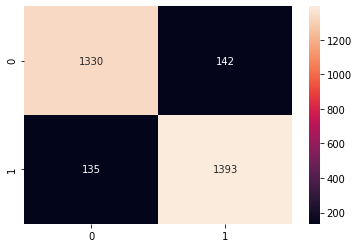

In [51]:
sns.heatmap(cm, annot=True, fmt='g')

### Improving Our Model

In [52]:
from sklearn.model_selection import GridSearchCV

Below we will add parameters which we can experiment with. So our model will get evaluated with all possible combinations to get the best score and param combination.


In [53]:
params = {
    "n_neighbors": [5, 10, 20],
    'leaf_size' : [30, 40, 50],
    'algorithm': ["ball_tree", "kd_tree", "brute"],
    'p': [1, 2]
}
gs = GridSearchCV(estimator=knn, cv=10, param_grid=params )

In [55]:
gsresult = gs.fit(x_train_ml, y_train_ml )
# it may take a while as grid search cv will run your mode with all the possible 
# combinations of given params.

In [56]:
print(gsresult.best_score_) 
print(gsresult.best_params_) 

0.9190000000000002
{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 20, 'p': 1}


**Observation:**

We have increased the accuracy of training data with more than 1%. So this is the best possible combination for our model. 

In [58]:
knn_best_fit = KNeighborsClassifier(algorithm = "ball_tree", leaf_size= 30, n_neighbors = 20, p=1)
knn_best_fit.fit(x_train_ml, y_train_ml)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=1,
                     weights='uniform')

In [60]:
y_predict_best = knn_best_fit.predict(x_test_ml)

In [61]:
cm_best = confusion_matrix(y_test_ml, y_predict_best)
cm_best

array([[1352,  120],
       [ 133, 1395]])

In [63]:
print("accuracy:", knn.score(x_test_ml, y_predict_best)) 

accuracy: 0.9706666666666667


**Observation:**

The accuracy of our new model is 97% which means 7% more than our old model for unseen data or test data, which is amazing.

### Plotting Final Confusion Matrix

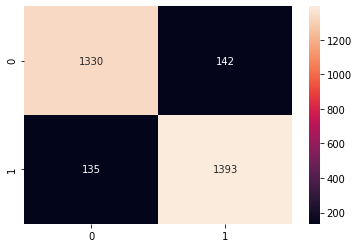

In [64]:
# Confusion Matrix 1 (90% Accuracy)
sns.heatmap(cm, annot=True, fmt='g')

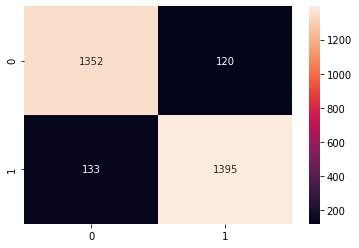

In [65]:
# Confusion Matrix 2 Best Fit (97% Accuracy)
sns.heatmap(cm_best, annot=True, fmt='g')